<div style="background-image: url('style_notebook.jpeg'); padding: 20px;
            border-radius: 10px; background-attachment: fixed;">
    <div style="margin: 20px; margin-top: 100px; color: white;">
        <center>
            <b style="font-size: 40px;">Network Analysis: FInal Project</b>
            <br>
            <br>
            <b style="font-size: 30px;">Graph</b>
            <br>
        </center>
        <div style="font-size: 20px; margin-left: 60%; margin-top: 50px;">
            <b>Trabalho reallizado por:</b>
            <ul>
                <li>Rodrigo Sarroeira, nº 92761</li>
                <li>Wendel Vilaça, nº 109881</li>
            </ul>
        </div>
    </div>
</div>

<div style="background-image: url('style_notebook.jpeg'); padding: 10px;
            border-radius: 20px; color: white; background-attachment: fixed;">
    <center><h1>0. Imports</h1></center>
</div>

In [22]:
import pickle
import folium
import numpy as np
import pandas as pd
import networkx as nx
import folium.plugins
import matplotlib.pyplot as plt

<div style="background-image: url('style_notebook.jpeg'); padding: 10px;
            border-radius: 20px; color: white; background-attachment: fixed;">
    <center><h1>1. Write / Read Data</h1></center>
</div>

<p style="font-size: 18px; text-align: justify; line-height: 24px; font-family: Courier New;">
    In this phase, the data preprocessed in the "preprocess" notebook is used. Firstly, we will start by saving the data into a network structure resorting to the networkx python package. Our database contains information on almost 1.5M taxi trips, to avoid building a very complex graph, a simplification will take place. Instead of creating an edge for each trip, one edge is created if there is at least one trip connecting two areas, the weights of each edge will correspond to the number of trips and flow of passangers between two given areas. For example, lets imagine that there are two trips in our database that connect areas 12 and 452. The first trip transported 3 passangers and the second trasported only 1. The edge inserted in the graph would be (area1=12, area2=452, n_trip=2, n_pass=4). This way we avoid creating a graph with 1.5M edges, the weights of this graph are fundamental given that they contain most of the information. Resourting to this method, a graph with 517 nodes and 8480 edges is built.
</p>

In [23]:
data = pd.read_csv("data/csv/data_clean.csv")
data.head(5)

,n_pass,trip_duration,area1,area2,year,month,hour
0,1,405,79,64,2016,1,20
1,1,757,64,64,2016,3,3
2,2,1060,94,125,2016,3,22
3,1,304,48,32,2016,3,22
4,2,799,156,109,2016,1,18


In [24]:
wrote = True

if not wrote:
    g = nx.DiGraph()
    for area1 in set(data["area1"]):
        for area2 in set(data["area2"]):
            data_filter = data[(data["area1"] == area1) & (data["area2"] == area2)]
            len_filter = len(data_filter)
            if len_filter != 0:
                total_trips = len_filter
                total_pass = sum(data_filter["n_pass"])
                total_dur = sum(data_filter["trip_duration"])
                g.add_edge(u_of_edge=area1,
                           v_of_edge=area2,
                           n_trip=total_trips,
                           n_pass=total_pass,
                           dur=total_dur)
                
    pickle.dump(g, open("data/nx/graph","wb"))
    
else:
    g = pickle.load(open("data/nx/graph","rb"))

In [25]:
print(f"Nº of nodes: {len(g.nodes)}, Nº edges: {len(g.edges)}")

Nº of nodes: 207, Nº edges: 8370


In [26]:
wrote = True

if not wrote:
    for hour in set(data["hour"]):
        g = nx.DiGraph()
        data_hour = data[data["hour"] == hour]
        for area1 in set(data_hour["area1"]):
            for area2 in set(data_hour["area2"]):
                data_filter = data_hour[(data_hour["area1"] == area1) & (data_hour["area2"] == area2)]
                len_filter = len(data_filter)
                if len_filter != 0:
                    total_trips = len_filter
                    total_pass = sum(data_filter["n_pass"])
                    total_dur = sum(data_filter["trip_duration"])
                    g.add_edge(u_of_edge=area1,
                               v_of_edge=area2,
                               n_trip=total_trips,
                               n_pass=total_pass,
                               dur=total_dur)
        print(f"Hour: {hour}, Nº of nodes: {len(g.nodes)}, Nº edges: {len(g.edges)}")
        pickle.dump(g, open(f"data/nx/graph_{hour}","wb"))

<div style="background-image: url('style_notebook.jpeg'); padding: 10px;
            border-radius: 20px; color: white; background-attachment: fixed;">
    <center><h1>2. Graph study Metrics</h1></center>
</div>

<div style="border: 4px solid #00004d;
            border-radius: 20px; color: white; background-attachment: fixed; color: #00004d; padding: 5px;">
    <center><h1>2.1 Degree Study</h1></center>
</div>

<p style="font-size: 18px; text-align: justify; line-height: 24px; font-family: Courier New;">
    The following cells of code calculate the minimum, average, and maximum degree of each node. Given that our graph is directed, 3 degrees are calculated (total, in, out).
</p>

In [27]:
# Mean degree
degrees = [val for (node, val) in g.degree]
out_degrees = [val for (node, val) in g.out_degree]
in_degrees = [val for (node, val) in g.in_degree]

In [28]:
degree = [min(degrees), np.mean(degrees), max(degrees)]
degree_out = [min(out_degrees), np.mean(out_degrees), max(out_degrees)]
degree_in = [min(in_degrees), np.mean(in_degrees), max(in_degrees)]

In [29]:
degrees_dict = {"Degree": degree, "In Degree": degree_in, "Out Degree": degree_out}
degrees_df = pd.DataFrame(degrees_dict, index=["Min", "Mean", "Max"])
degrees_df

,Degree,In Degree,Out Degree
Min,1.000000,0.000000,0.000000
Mean,80.869565,40.434783,40.434783
Max,266.000000,99.000000,168.000000


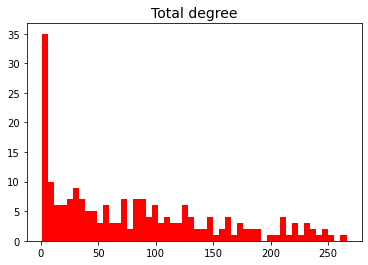

In [30]:
plt.hist(degrees, bins=50, color="red")
plt.title("Total degree", fontsize=14)
plt.show()
plt.close()

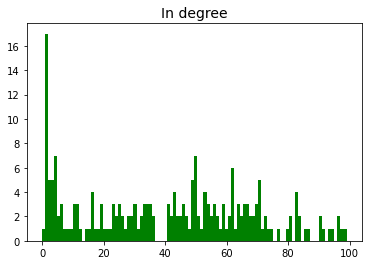

In [31]:
plt.hist(in_degrees, bins=100, color="green")
plt.title("In degree", fontsize=14)
plt.show()
plt.close()

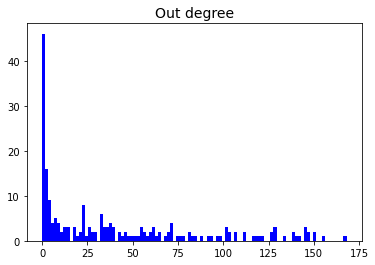

In [32]:
plt.hist(out_degrees, bins=100, color="blue")
plt.title("Out degree", fontsize=14)
plt.show()
plt.close()

<div style="border: 4px solid #00004d;
            border-radius: 20px; color: white; background-attachment: fixed; color: #00004d; padding: 5px;">
    <center><h1>2.2 Density Study</h1></center>
</div>

<p style="font-size: 18px; text-align: justify; line-height: 24px; font-family: Courier New;">
    In the context of our problem, the density of the network shows that only 3.2% of all the connections between two areas are present in the database. This metric is calculated resorting to the nx.density function, and confirmed using the mathematical formula.</p>

In [33]:
# low density -> this means that only 3% of all the possible trips between areas two different exist

nx.density(g)

0.19628535246939638

In [34]:
8370 / (207 * 206)

0.19628535246939638

<div style="border: 4px solid #00004d;
            border-radius: 20px; color: white; background-attachment: fixed; color: #00004d; padding: 5px;">
    <center><h1>2.3 Assortativity Study</h1></center>
</div>

In [170]:
# assortativity
nx.degree_assortativity_coefficient(g)

-0.10247823295722229

<div style="border: 4px solid #00004d;
            border-radius: 20px; color: white; background-attachment: fixed; color: #00004d; padding: 5px;">
    <center><h1>2.4 Clustering Coeficient</h1></center>
</div>

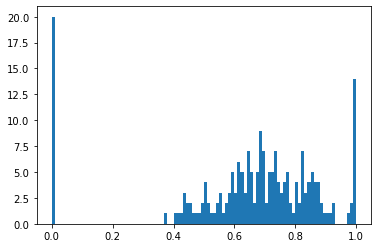

<function matplotlib.pyplot.close(fig=None)>

In [37]:
plt.hist([ val for key, val in nx.clustering(g).items()], bins=100)
plt.show()
plt.close

In [38]:
nx.average_clustering(g)

0.6462128503618509

<div style="border: 4px solid #00004d;
            border-radius: 20px; color: white; background-attachment: fixed; color: #00004d; padding: 5px;">
    <center><h1>2.5 Betweeness</h1></center>
</div>

In [43]:
sum(nx.betweenness_centrality(g).values()) / len(nx.betweenness_centrality(g).values())

0.0033652839694289717

(array([104.,  11.,  12.,   4.,   7.,   8.,   4.,   2.,   7.,   3.,   1.,
          5.,   2.,   3.,   2.,   2.,   3.,   2.,   0.,   2.,   1.,   1.,
          0.,   0.,   1.,   1.,   1.,   1.,   2.,   1.,   1.,   0.,   1.,
          1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.00045195, 0.00090391, 0.00135586, 0.00180781,
        0.00225976, 0.00271172, 0.00316367, 0.00361562, 0.00406758,
        0.00451953, 0.00497148, 0.00542343, 0.00587539, 0.00632734,
        0.00677929, 0.00723125, 0.0076832 , 0.00813515, 0.00858711,
        0.00903906, 0.00949101, 0.00994296, 0.

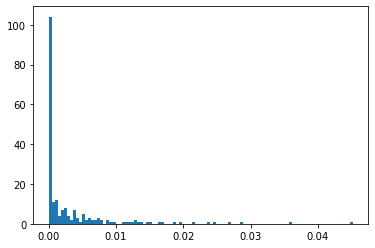

In [46]:
plt.hist([ val for key, val in nx.betweenness_centrality(g).items()], bins=100)

<div style="border: 4px solid #00004d;
            border-radius: 20px; color: white; background-attachment: fixed; color: #00004d; padding: 5px;">
    <center><h1>2.6 Closeness</h1></center>
</div>

In [45]:
sum(nx.closeness_centrality(g).values()) / len(nx.closeness_centrality(g).values())

0.4141571202696003

(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  2.,  0.,  1.,  5.,  1.,  3.,  3.,  6.,  3.,  6.,  1.,  3.,
         3.,  4.,  4.,  3.,  2.,  6.,  6.,  7.,  7.,  5.,  8.,  2.,  8.,
         6., 13.,  8.,  4.,  8.,  8.,  7.,  6.,  9.,  7.,  3.,  2.,  0.,
         2.,  7.,  2.,  0.,  3.,  0.,  2.,  2.,  2.]),
 array([0.        , 0.00553905, 0.01107809, 0.01661714, 0.02215618,
        0.02769523, 0.03323428, 0.03877332, 0.04431237, 0.04985141,
        0.05539046, 0.06092951, 0.06646855, 0.0720076 , 0.07754664,
        0.08308569, 0.08862474, 0.09416378, 0.09970283, 0.10524187,
        0.11078092, 0.11631997, 0.12185901, 0.12739806, 0.1329371 ,
        0.13847615, 0.1440152 , 0.14955424, 0.15509329, 0.16063233,
        0.16617138, 0.1717

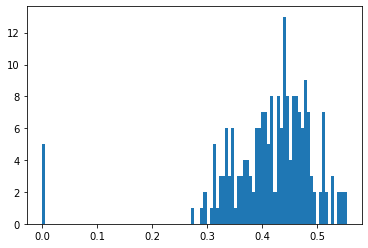

In [47]:
plt.hist([ val for key, val in nx.closeness_centrality(g).items()], bins=100)

<div style="background-image: url('style_notebook.jpeg'); padding: 10px;
            border-radius: 20px; color: white; background-attachment: fixed;">
    <center><h1>3. Graph study Visualization</h1></center>
</div>

In [14]:
# Function that recieves normalized values and returns a correspondent color from a colormap

def color(intensity):
    rgb = np.array(plt.cm.inferno(intensity)[0:3]) * 256
    rgb = rgb.astype("int64")
    rgb = tuple(rgb)
    return '#%02x%02x%02x' % rgb

In [17]:
# Get nodes locations
areas_location = pickle.load(open("data/nx/areas_df", "rb"))
areas_location.head(5)

,area_id,lat,lng
0,0,40.68328,-74.030592
1,1,40.68328,-74.020592
2,2,40.68328,-74.010592
3,3,40.68328,-74.000592
4,4,40.68328,-73.990592


<div style="border: 4px solid #00004d;
            border-radius: 20px; color: white; background-attachment: fixed; color: #00004d; padding: 5px;">
    <center><h1>3.1 Flow of passengers</h1></center>
</div>

In [18]:
n_pass_max = max([edge[2]["n_pass"] for edge in g.edges(data=True)])
n_pass_min = min([edge[2]["n_pass"] for edge in g.edges(data=True)])

In [22]:
m_pass = folium.Map(location=[40.770610, -73.950242], zoom_start=11, control_scale=True)
   
for node in g.nodes():
    folium.CircleMarker(location=list(areas_location.iloc[node][1:3]), radius=1,
                        color='black', popup=node, opacity=1).add_to(m_pass) 
    
for edge in sorted(g.edges(data=True), key=lambda x: x[2].get("n_pass")):
    area1 = list(areas_location.iloc[edge[0]][1:3])
    area2 = list(areas_location.iloc[edge[1]][1:3])
    coordinates = [area1, area2]
    n_pass_norm = (edge[2]["n_pass"] - n_pass_min) / (n_pass_max - n_pass_min)
    c = color(n_pass_norm)
    my_PolyLine=folium.PolyLine(locations=coordinates, weight=n_pass_norm*5,
                                opacity=n_pass_norm * 100, color=c)
    m_pass.add_child(my_PolyLine)

m_pass

<div style="border: 4px solid #00004d;
            border-radius: 20px; color: white; background-attachment: fixed; color: #00004d; padding: 5px;">
    <center><h1>3.3 Number of trips by hour</h1></center>
</div>

In [24]:
for g in hour_graphs:
    n_pass_max, n_pass_min = [], []
    n_pass_max.append(max([edge[2]["n_pass"] for edge in g.edges(data=True)]))
    n_pass_min.append(min([edge[2]["n_pass"] for edge in g.edges(data=True)]))
    
n_pass_max = max(n_pass_max)
n_pass_min = max(n_pass_min)

In [32]:
def create_map():
    m_pass_hour = folium.Map(location=[40.770610, -73.950242], zoom_start=12, control_scale=True)
    
    fs = folium.plugins.Fullscreen()
    m_pass_hour.add_child(fs)
    
    fg = folium.FeatureGroup(name="Global")
    m_pass_hour.add_child(fg)
    
    m_pass_hour.add_child(folium.LayerControl())
    
    return m_pass_hour, fg

In [33]:
for hour in set(data["hour"]):
    
    g = pickle.load(open(f"data/nx/graph_{hour}","rb"))
    m_pass_hour, fg = create_map()
    
    for node in g.nodes():
        folium.CircleMarker(location=list(areas_location.iloc[node][1:3]), radius=1,
                            color='black', popup=node, opacity=1).add_to(m_pass_hour)    

    for edge in sorted(g.edges(data=True), key=lambda x: x[2].get("n_pass")):
        area1 = list(areas_location.iloc[edge[0]][1:3])
        area2 = list(areas_location.iloc[edge[1]][1:3])
        coordinates = [area1, area2]
        n_pass_norm = (edge[2]["n_pass"] - n_pass_min) / (n_pass_max - n_pass_min)
        c = color(n_pass_norm)
        my_PolyLine=folium.PolyLine(locations=coordinates, weight=n_pass_norm*5,
                                    opacity=n_pass_norm * 100, color=c).add_to(m_pass_hour)
    print(hour)
    m_pass_hour.save(f"maps/map_{hour}.html")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
